In [3]:
import numpy as np
import xarray as xr
import os.path as op
import dask.array as dsar
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
import xrft
from matplotlib.colors import SymLogNorm
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [95]:
mon = xr.open_dataset(op.join(bdir,'monitor.0001944000.t001.nc'))
mon

<xarray.Dataset>
Dimensions:               (T: 961)
Coordinates:
  * T                     (T) float64 7.776e+09 7.779e+09 7.781e+09 ...
Data variables:
    time_tsnumber         (T) int32 ...
    time_secondsf         (T) float64 ...
    dynstat_eta_max       (T) float64 ...
    dynstat_eta_min       (T) float64 ...
    dynstat_eta_mean      (T) float64 ...
    dynstat_eta_sd        (T) float64 ...
    dynstat_eta_del2      (T) float64 ...
    dynstat_uvel_max      (T) float64 ...
    dynstat_uvel_min      (T) float64 ...
    dynstat_uvel_mean     (T) float64 ...
    dynstat_uvel_sd       (T) float64 ...
    dynstat_uvel_del2     (T) float64 ...
    dynstat_vvel_max      (T) float64 ...
    dynstat_vvel_min      (T) float64 ...
    dynstat_vvel_mean     (T) float64 ...
    dynstat_vvel_sd       (T) float64 ...
    dynstat_vvel_del2     (T) float64 ...
    dynstat_wvel_max      (T) float64 ...
    dynstat_wvel_min      (T) float64 ...
    dynstat_wvel_mean     (T) float64 ...
    dynst

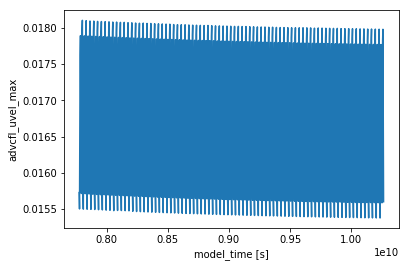

In [98]:
mon.advcfl_uvel_max.plot()

In [26]:
dt = 4.8e3
ys,dy = (380,85) # 330 yrs of spin up
ts = int(ys*360*86400/dt)
te = int(ts+dy*360*86400/dt)
print(ts,te)

2462400 3013200


In [27]:
dsave = open_mdsdataset(op.join(bdir,'100kmMLI_GMR1000'), 
                       grid_dir=op.join(bdir,'100km_grid'), 
                       iters=range(ts+540,te+540,540),
#                        iters=range(int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                       + 177*360*86400/dt)+1440,
#                                   int(360*86400*ys/8e2 + 0e0*360*86400/12e2 + 112e0*360*86400/36e2 
#                                      + 177*360*86400/dt+360*86400*17/dt)+1440,1440),
                       prefix=['Ttave',
#                                'wVeltave',
                              'PTRtave03'
#                               ,'PtrFlux03'
                              ], delta_t=dt
                      )
dsave

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/100kmMLI_GMR1000. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:    (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1020)
Coordinates:
  * XC         (XC) >f4 50000.0 150000.0 250000.0 ... 750000.0 850000.0 950000.0
  * YC         (YC) >f4 50000.0 150000.0 250000.0 ... 1850000.0 1950000.0
  * XG         (XG) >f4 0.0 100000.0 200000.0 ... 700000.0 800000.0 900000.0
  * YG         (YG) >f4 0.0 100000.0 200000.0 ... 1700000.0 1800000.0 1900000.0
  * Z          (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * Zp1        (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu         (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl         (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2676.0 -2779.0 -2882.0
    rA         (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG        (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG        (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth      (YC, XC) >f4 dask.array<sha

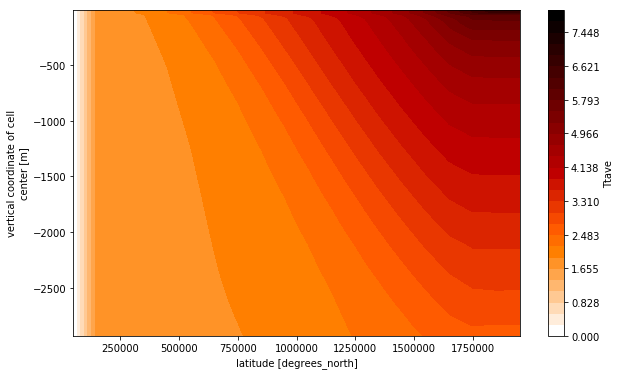

In [5]:
fig,ax = plt.subplots(figsize=(10,6))
# (dsave.PTRtave03.mean(['time','XC'])*1e3).plot.contourf(ax=ax, levels=np.linspace(0,.4,11),
#                                                         cmap='gist_heat_r')
dsave.Ttave.mean(['time','XC']).plot.contourf(ax=ax, levels=np.linspace(0,8,30),
                                            cmap='gist_heat_r')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


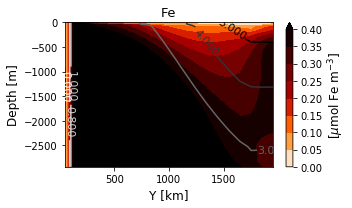

In [28]:
tlevs = np.array([0,.8,1,3,4,5])
fig, ax = plt.subplots(figsize=(5,3))
fig.set_tight_layout(True)
im = ax.contourf(dsave.YC*1e-3, dsave.Z, dsave.PTRtave03[-60:].mean(['time','XC'])*1e3,
               levels=np.linspace(0,.4,9), extend='max', cmap = 'gist_heat_r')
cs = ax.contour(dsave.YC*1e-3, dsave.Z, dsave.Ttave[-60:].mean(['time','XC']), 
              levels=tlevs, cmap='binary')
for c in im.collections:
    c.set_rasterized(True)
for c in cs.collections:
    c.set_rasterized(True)
ax.set_title(r"Fe", fontsize=13)
ax.set_ylabel(r"Depth [m]", fontsize=12)
ax.set_xlabel(r"Y [km]", fontsize=12)
ax.set_ylim([dsave.Z[-1],0])
plt.clabel(cs, inline=1, fontsize=11)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"[$\mu$mol Fe m$^{-3}$]",fontsize=12)
plt.savefig(op.join(bdir,'Figures/Fe-transect_100km-GM1000.pdf'))

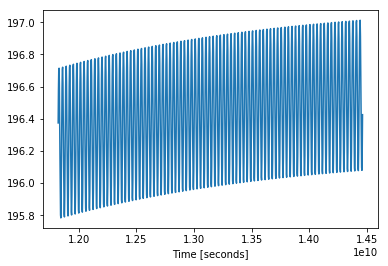

In [31]:
(dsave.Ttave*dsave.drF).mean(['Z','YC','XC']).plot()

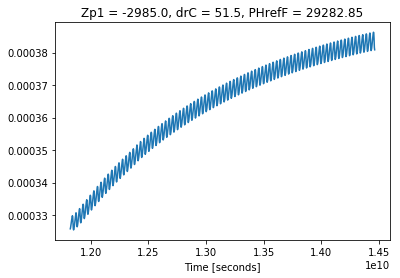

In [32]:
(dsave.PTRtave03*dsave.drF*np.abs(dsave.Zp1[-1])**-1).sum('Z').mean(['YC','XC']).plot()

In [103]:
ds = open_mdsdataset(op.join(bdir,'100kmMLI_fmR1000diag'), 
                    grid_dir=op.join(bdir,'100km_grid'), 
                    iters=range(ts+18,te+18,18),
                    prefix=['MOMtave','FeTtave','BIOtave',
                           'KPPboundary'
                           ], delta_t=dt
                    )
ds

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 1800)
Coordinates:
  * XC        (XC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * YC        (YC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * XG        (XG) >f4 0.0 100000.0 200000.0 300000.0 400000.0 500000.0 ...
  * YG        (YG) >f4 0.0 100000.0 200000.0 300000.0 400000.0 500000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG       (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG       (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth     (YC, XC) >f4 

In [106]:
grid = Grid(ds, periodic=['X'])

In [113]:
hbl99 = xr.DataArray(np.percentile(ds.KPPhbl, 99, axis=-1), dims=['time','YC'],
                    coords={'time':ds.time,'YC':ds.YC})
hbl99.coords['day'] = ('time',np.tile(range(360),dy))
hbl99.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
hbl99.coords['month'] = ('time',np.tile(np.repeat(range(12),30),dy))
hbl99.to_dataset(name='hbl99').to_netcdf(op.join(bdir,'KPPhbl_99percentile_100kmMLI-02km_fmR1000.nc'))
# hbl99 = xr.open_dataset(op.join(bdir,'KPPhbl_99percentile_20kmMLI-Ce007_Tau55-02km.nc'), 
#                         decode_times=False).hbl99
with ProgressBar():
    hbl99_day = hbl99.groupby('day').mean('time').compute()
# #     hbl99_sea = hbl99.groupby('seas').mean('time').compute()
# #     hbl99_mon = hbl99.groupby('month').mean('time').compute()
hbl99_day

<xarray.DataArray (day: 360, YC: 20)>
array([[   0. , 2933.5,   30. , ...,   30. ,   30. ,   30. ],
       [   0. , 2933.5,   30. , ...,   30. ,   30. ,   30. ],
       [   0. , 2933.5,   30. , ...,   30. ,   30. ,   30. ],
       ...,
       [   0. , 2933.5,   30. , ...,   30. ,   30. ,   30. ],
       [   0. , 2933.5,   30. , ...,   30. ,   30. ,   30. ],
       [   0. , 2933.5,   30. , ...,   30. ,   30. ,   30. ]])
Coordinates:
  * YC       (YC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

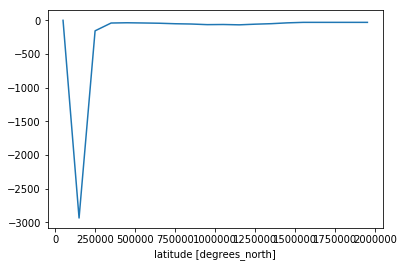

In [114]:
(-hbl99).mean(['time']).plot()

In [107]:
dsnap = open_mdsdataset(op.join(bdir,'100kmMLI_fmR1000diag'), 
                       grid_dir=op.join(bdir,'100km_grid'), iters=range(ts,te,270),
                       prefix=['W','PTRACER03',
#                               'PTRACER26'
                              ], delta_t=dt
                       )
dsmon = open_mdsdataset(op.join(bdir,'100kmMLI_fmR1000diag'), 
                       grid_dir=op.join(bdir,'100km_grid'), iters=range(ts+540,te+540,540),
                       prefix=['wVeltave','PTRtave03',
#                               'PTRtave26'
                              ], delta_t=dt
                       )
wsp = dsnap.W
Fesp = dsnap.PTRACER03
# POCsp = dsnap.PTRACER26
wm = dsmon.wVeltave
Fem = dsmon.PTRtave03
# POCm = dsmon.PTRtave26
print(wsp,wm)

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.DataArray 'W' (time: 120, Zl: 40, YC: 20, XC: 10)>
dask.array<shape=(120, 40, 20, 10), dtype=float32, chunksize=(1, 40, 20, 10)>
Coordinates:
  * XC       (XC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * YC       (YC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth    (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    iter     (time) int64 dask.array<shape=(120,), chunksize=(1,)>
  * time     (time) float64 1.026e+10 1.027e+10 1.027e+10 1.027e+10 ...
Attributes:
    standard_name:  sea_water_z_velocity
    long_name:      Vertical Component of Velocity
    units:          m s-1 <xarray.DataArray 'wVeltave' (time: 60, Zl: 40, YC: 20, XC: 10)>
dask.array<shape=(60, 40, 20, 10), dtype=float32, chunksize=(1, 40, 20, 10)>
Coordinates:
  * XC       (XC) >f4 50000.0 150000.0 2500

In [108]:
diff = ds.DFrITr03+ds.DFrETr03
advW = ds.ADVrTr03
dfz_cons = diff/(ds.rA)
adz_cons = advW/(ds.rA)
dfz_cons.coords['day'] = ('time',np.tile(range(360),dy))
adz_cons.coords['day'] = ('time',np.tile(range(360),dy))
wsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
Fesp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
wm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
Fem.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
# POCsp.coords['seas'] = ('time',np.tile(np.repeat(range(4),6),dy))
# POCm.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
wp = wsp.groupby('seas') - wm.groupby('seas').mean(['time','XC'])
Fep = Fesp.groupby('seas') - Fem.groupby('seas').mean(['time','XC'])
# POCp = POCsp.groupby('seas') - POCm.groupby('seas').mean(['time','XC'])

In [109]:
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
wpFep.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    dfz_c = dfz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
#     adz_c = adz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    wpFep_d = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()

[########################################] | 100% Completed | 14.9s
[########################################] | 100% Completed |  3.0s


In [112]:
dsGM = open_mdsdataset(op.join(bdir,'100kmMLI_fmR1000diag'),
                      grid_dir=op.join(bdir,'100km_grid'), iters=range(ts,te,270),
                      prefix=['GMpsi15D',
                             ], delta_t=dt
                      )
dsGM

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 10, XG: 10, YC: 20, YG: 20, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 120)
Coordinates:
  * XC       (XC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * YC       (YC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * XG       (XG) >f4 0.0 100000.0 200000.0 300000.0 400000.0 500000.0 ...
  * YG       (YG) >f4 0.0 100000.0 200000.0 300000.0 400000.0 500000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu       (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dxG      (YG, XC) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    dyG      (YC, XG) >f4 dask.array<shape=(20, 10), chunksize=(20, 10)>
    Depth    (YC, XC) >f4 dask.array<sha

In [115]:
gridGM = Grid(dsGM, periodic=['X'])
Psiyk = xrft.dft(dsGM.GM_PsiY, dim=['XC'], shift=False)
Psiy_x = dsar.fft.ifft((Psiyk*1j*2*np.pi*Psiyk.freq_XC).data, axis=-1).compute()
Psiy_x = gridGM.interp(xr.DataArray(Psiy_x.real, dims=dsGM.GM_PsiY.dims, coords=dsGM.GM_PsiY.coords),
                      'Y', boundary='fill')
with ProgressBar():
    wGM = (Psiy_x - gridGM.interp(gridGM.interp(gridGM.diff(dsGM.GM_PsiX*dsGM.dxC,'Y',boundary='fill')
                                               / dsGM.rAz,
                                               'Y',boundary='fill'),
                                 'X')
          ).compute()
wGM

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  4.7s


<xarray.DataArray (time: 120, Zl: 40, YC: 20, XC: 10)>
array([[[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 0.000000e+00, ...,  0.000000e+00]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-1.537683e-22, ...,  1.625427e-22]]],


       ...,


       [[[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [ 0.000000e+00, ...,  0.000000e+00]],

        ...,

        [[ 0.000000e+00, ...,  0.000000e+00],
         ...,
         [-1.566334e-22, ...,  1.605094e-22]]]])
Coordinates:
  * time     (time) float64 1.026e+10 1.027e+10 1.027e+10 1.027e+10 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * YC       (YC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...
  * XC       (XC) >f4 50000.0 150000.0 250000.0 350000.0 450000.0 550000.0 ...

In [118]:
wGMFe_adv = wGM*grid.interp(Fesp,'Z',boundary='fill')
wGMFe_adv.coords['day'] = ('time',np.tile(range(24),dy))
with ProgressBar():
    wGMFe_advd = wGMFe_adv.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
wGMFe_advd

[########################################] | 100% Completed |  2.0s


<xarray.DataArray (day: 24, Zl: 40)>
array([[ 0.000000e+00,  3.269743e-28,  3.557881e-28, ...,  5.246065e-32,
        -1.472229e-30,  3.895495e-29],
       [ 0.000000e+00,  2.457812e-28,  2.683803e-28, ...,  7.327837e-32,
        -1.543009e-30,  3.985594e-29],
       [ 0.000000e+00,  1.989412e-28,  2.161544e-28, ..., -6.983207e-23,
        -3.256840e-23,  4.013157e-29],
       ...,
       [ 0.000000e+00, -2.587591e-28, -2.113350e-28, ...,  7.910733e-32,
        -1.101674e-30,  3.534682e-29],
       [ 0.000000e+00,  1.039500e-28,  1.131621e-28, ..., -1.240878e-22,
        -1.218253e-30,  3.630360e-29],
       [ 0.000000e+00,  3.650989e-28,  3.954498e-28, ...,  4.996253e-32,
         5.707681e-22,  3.760013e-29]])
Coordinates:
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [120]:
Fe1D = ds.TRAC03
Fe1D.coords['day'] = ('time',np.tile(np.roll(range(360),0),dy))
with ProgressBar():
    Fe_c = Fe1D.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
Fe_c

[########################################] | 100% Completed | 13.7s


<xarray.DataArray 'TRAC03' (day: 360, Z: 40)>
array([[3.429686e-06, 3.402950e-06, 3.380198e-06, ..., 2.393328e-04,
        2.404354e-04, 2.414382e-04],
       [3.535343e-06, 3.508910e-06, 3.486158e-06, ..., 2.393319e-04,
        2.404361e-04, 2.414429e-04],
       [3.643385e-06, 3.617279e-06, 3.594594e-06, ..., 2.393311e-04,
        2.404369e-04, 2.414477e-04],
       ...,
       [3.128503e-06, 3.100509e-06, 3.077802e-06, ..., 2.389915e-04,
        2.400879e-04, 2.410772e-04],
       [3.224618e-06, 3.197052e-06, 3.174221e-06, ..., 2.389905e-04,
        2.400884e-04, 2.410816e-04],
       [3.324016e-06, 3.296863e-06, 3.274007e-06, ..., 2.389896e-04,
        2.400889e-04, 2.410862e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


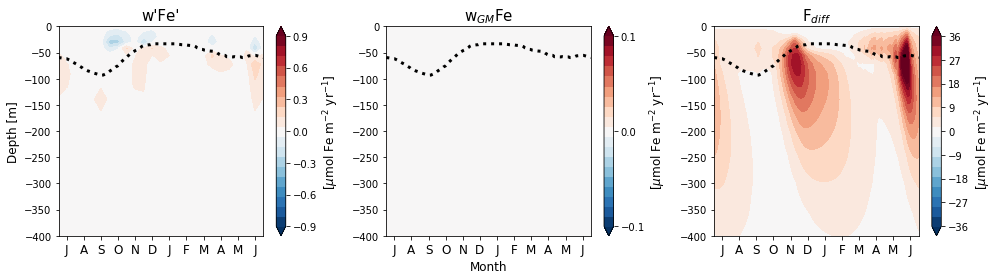

In [122]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
im1 = ax1.contourf(range(0,346,15), wpFep_d.Zl, wpFep_d.roll(day=-12).T*1e3*360*86400, 
                  levels=np.linspace(-.9,.9,20), 
                   cmap='RdBu_r', extend='both')
ax1.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.roll(day=-13).T*1e3*360*86400, 
            levels=np.linspace(-.9,.9,20), 
             cmap='RdBu_r', extend='both')
im2 = ax2.contourf(range(0,346,15), wGMFe_advd.Zl, wGMFe_advd.roll(day=-12).T*1e3*360*86400,
                  levels=1e-0*np.linspace(-.1,.1,20), 
                  extend='both', cmap='RdBu_r')
ax2.contourf(range(14,360,15), wGMFe_advd.Zl, wGMFe_advd.roll(day=-13).T*1e3*360*86400,
            levels=1e-0*np.linspace(-.1,.1,20), 
            extend='both', cmap='RdBu_r')
# im3 = ax3.contourf(range(360), Fe_c.Z, Fe_c.roll(day=-180).T*1e3, 
#                   levels=np.linspace(0,.3,11), cmap='OrRd', extend='max')
im3 = ax3.contourf(range(360), dfz_c.Zl, dfz_c.T.roll(day=-180)*1e3*(360*86400), 
                  levels=np.linspace(-36,36,20), 
                  cmap='RdBu_r', extend='both')
ax1.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax2.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax3.plot(range(360), -hbl99_day.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
       ls=':', lw=3, color='k')
ax1.set_title(r"w'Fe'", fontsize=15)
ax2.set_title(r"w$_{GM}$Fe", fontsize=15)
ax3.set_title(r"F$_{diff}$", fontsize=15)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"Month", fontsize=12)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylim([-400,0])
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_ylim([-400,0])
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_ylim([-400,0])
# fig.colorbar(im1, ax=ax1, ticks=[-10,-7.5,-5.,-2.5,0,2.5,5.,7.5,10])
# fig.colorbar(im2, ax=ax2, ticks=[-.8,-.6,-.4,-.2,0,.2,.4,.6,.8])
# cbar = fig.colorbar(im3, ax=ax3, ticks=[0,6,12,18,24,30])
# fig.subplots_adjust(right=0.85)
# cbar_ax = fig.add_axes([0.88, 0.16, 0.014, 0.68])
# cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10])
# cbar.set_label(r'[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=12)
cbar1 = fig.colorbar(im1, ax=ax1, 
                    ticks=[-.9,-.6,-.3,0,.3,.6,.9]
                    )
cbar2 = fig.colorbar(im2, ax=ax2, 
                    ticks=[-.1,-.75,-.5,-.25,0,.25,.5,.75,.1]
                    )
cbar3 = fig.colorbar(im3, ax=ax3, 
                    ticks=[-36,-27,-18,-9,0,9,18,27,36]
                    )
cbar1.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar2.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
# plt.savefig(op.join(bdir,'Figures/VerticalFeflux_20kmMLI-02km_fm200.pdf'))